MODIFY BRIGHTNESS OF THE IMG PERFORMING APPROPRIATE OPERATION

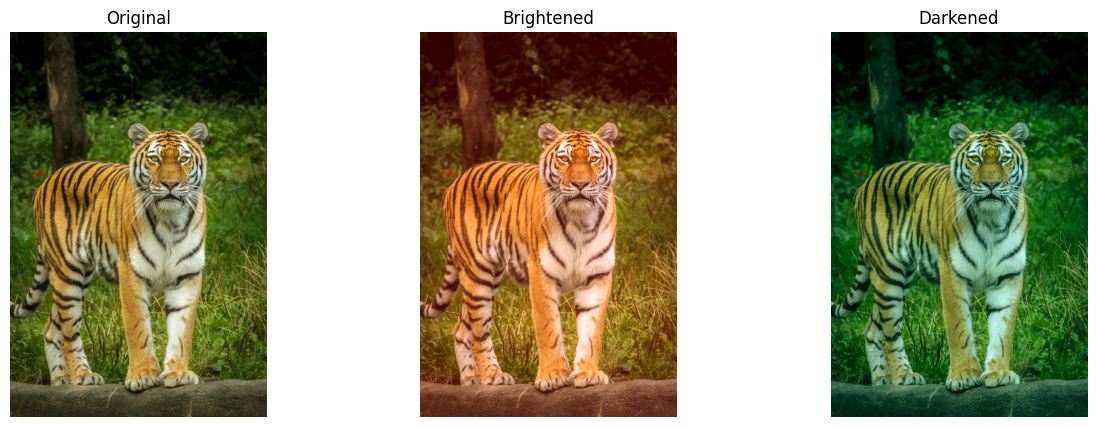

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('tiger.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for proper display

# Increase brightness
bright_image = cv2.add(image, np.array([50.0]))

# Decrease brightness
dark_image = cv2.subtract(image, np.array([50.0]))

# Plot the results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image)
plt.title('Original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(bright_image)
plt.title('Brightened')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(dark_image)
plt.title('Darkened')
plt.axis('off')

plt.show()


In [ ]:
img_rgb=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

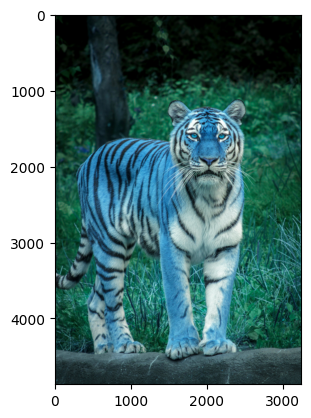

In [ ]:
plt.imshow(img_rgb)
plt.show()

MODIFY CONSTRAST OF IMG USING VARIOUS FILTER AND COMPARE RESULT

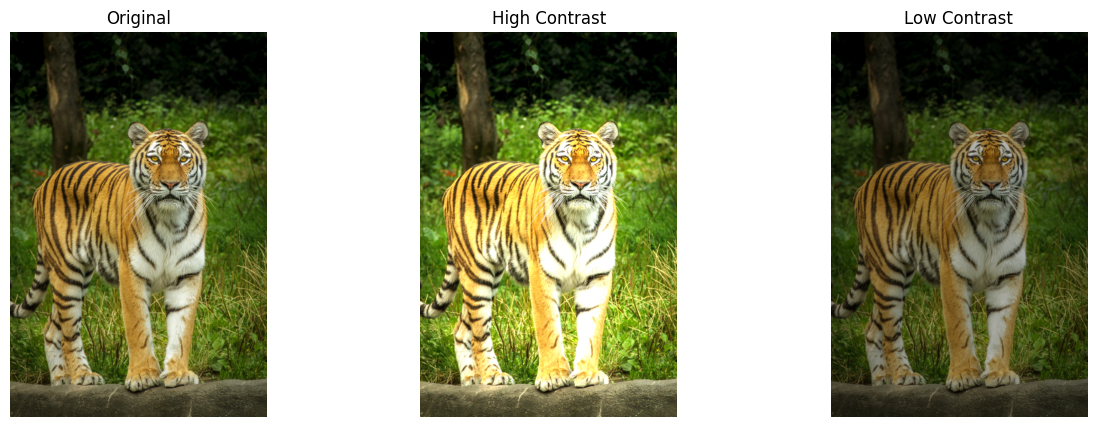

In [ ]:
# Increase contrast
contrast_high = cv2.convertScaleAbs(image, alpha=1.5, beta=0)  # Increase contrast
contrast_low = cv2.convertScaleAbs(image, alpha=0.7, beta=0)   # Decrease contrast

# Plot the results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image)
plt.title('Original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(contrast_high)
plt.title('High Contrast')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(contrast_low)
plt.title('Low Contrast')
plt.axis('off')

plt.show()


In [ ]:
# Q3. Remove noise using linear filters
box_filter = cv2.blur(image, (5, 5))
gaussian_filter = cv2.GaussianBlur(image, (5, 5), 0)


In [ ]:
# Q4. Remove noise using non-linear filter
median_filter = cv2.medianBlur(image, 5)


In [ ]:
# Q5. Identify edges using filters
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
edges_sobel = cv2.Sobel(gray_image, cv2.CV_64F, 1, 1, ksize=5)
edges_canny = cv2.Canny(gray_image, 100, 200)

plt.figure(figsize=(20, 10))


<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

(-0.5, 3244.5, 4866.5, -0.5)

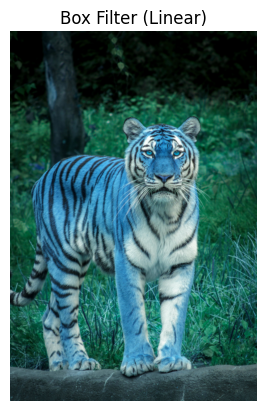

In [ ]:
# Noise removal
plt.imshow(box_filter)
plt.title("Box Filter (Linear)")
plt.axis('off')


(-0.5, 3244.5, 4866.5, -0.5)

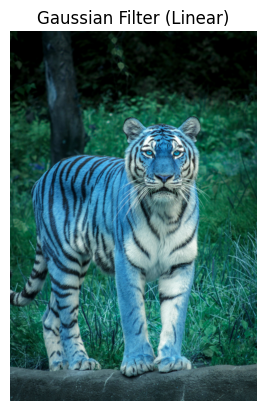

In [ ]:
plt.imshow(gaussian_filter)
plt.title("Gaussian Filter (Linear)")
plt.axis('off')

(-0.5, 3244.5, 4866.5, -0.5)

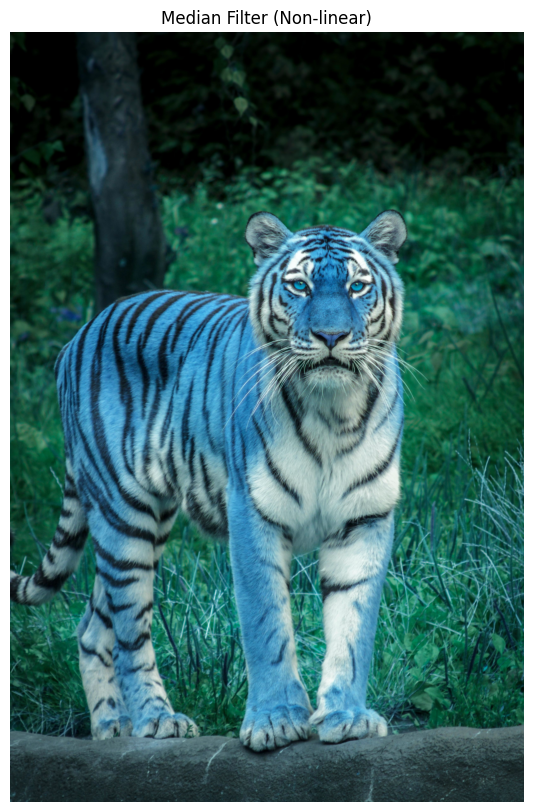

In [ ]:
plt.figure(figsize=(15, 10))

# Non-linear filter
plt.imshow(median_filter)
plt.title("Median Filter (Non-linear)")
plt.axis('off')


Write a program to compute the first-order gradients of an image in the x and y directions using Sobel filters. Combine the gradients to visualize edges.


In [ ]:
img=cv2.imread("tiger.jpg",cv2.IMREAD_GRAYSCALE)

In [ ]:
sobel_x=cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
sobel_y=cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)

In [ ]:
abs_sobel_x=np.absolute(sobel_x)
abs_sobel_y=np.absolute(sobel_y)

In [ ]:
edges_sobel = np.sqrt(abs_sobel_x**2 + abs_sobel_y**2)
edges_sobel = np.uint8(edges_sobel / edges_sobel.max() * 255)


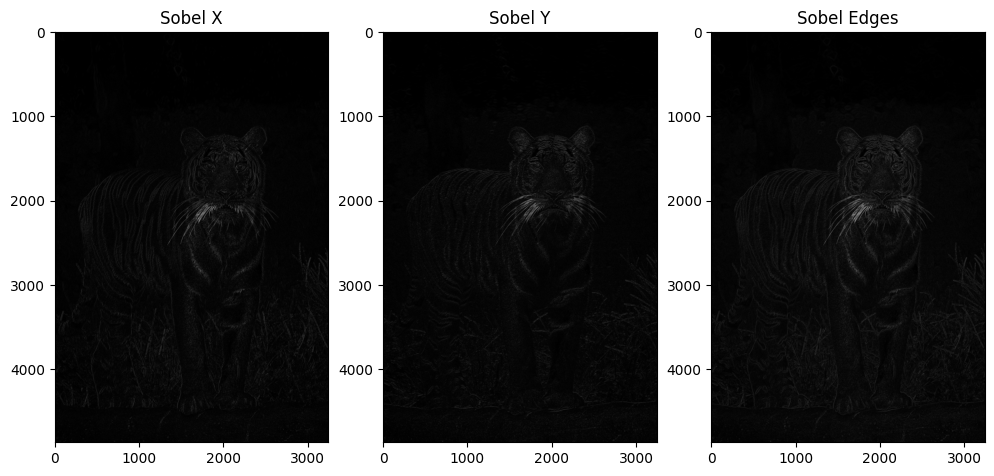

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.title("Sobel X")
plt.imshow(abs_sobel_x, cmap="gray")
plt.subplot(1, 3, 2)
plt.title("Sobel Y")
plt.imshow(abs_sobel_y, cmap="gray")
plt.subplot(1, 3, 3)
plt.title("Sobel Edges")
plt.imshow(edges_sobel, cmap="gray")
plt.show()

Apply edge thresholding

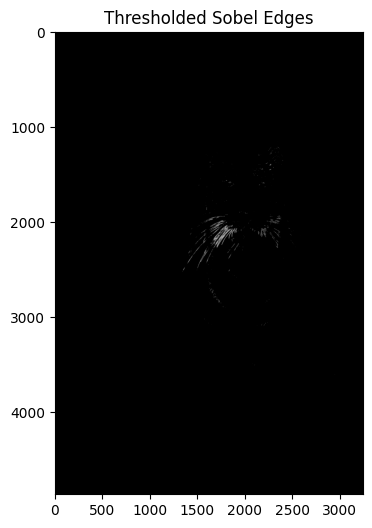

In [ ]:
threshold = 100
edges_thresholded = np.where(edges_sobel > threshold, 255, 0).astype(np.uint8)

plt.figure(figsize=(6, 6))
plt.title("Thresholded Sobel Edges")
plt.imshow(edges_thresholded, cmap="gray")
plt.show()

## Q3.Apply the Canny edge detection algorithm

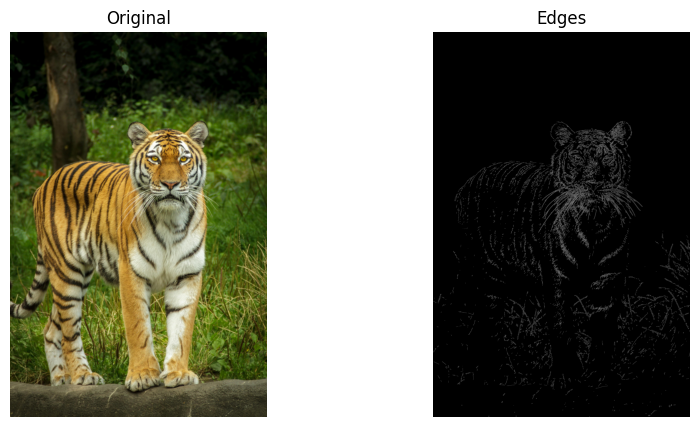

In [ ]:
# Detect edges
edges = cv2.Canny(image, 100, 200)

# Plot the result
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Edges')
plt.axis('off')

plt.show()


Experiment with low and high thresholds for Canny

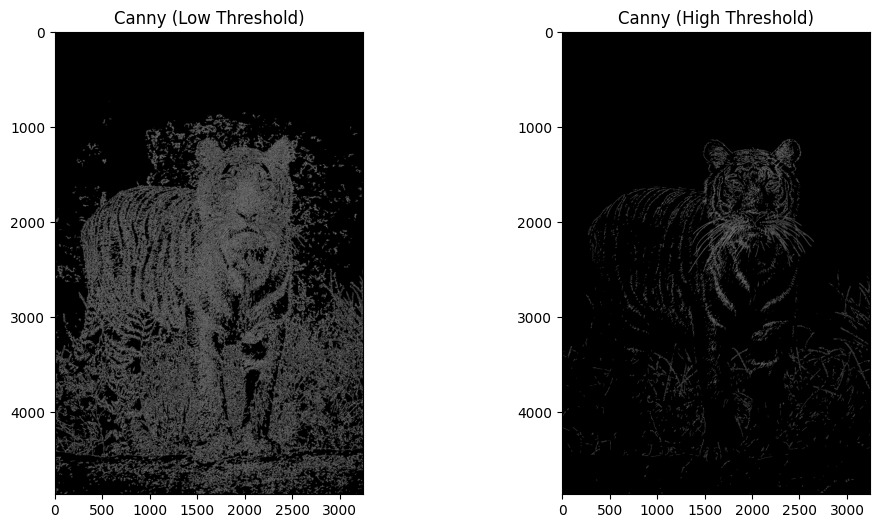

In [ ]:
edges_canny_low = cv2.Canny(image, 30, 100)
edges_canny_high = cv2.Canny(image, 100, 200)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Canny (Low Threshold)")
plt.imshow(edges_canny_low, cmap="gray")
plt.subplot(1, 2, 2)
plt.title("Canny (High Threshold)")
plt.imshow(edges_canny_high, cmap="gray")
plt.show()


Compare Sobel and Canny edges

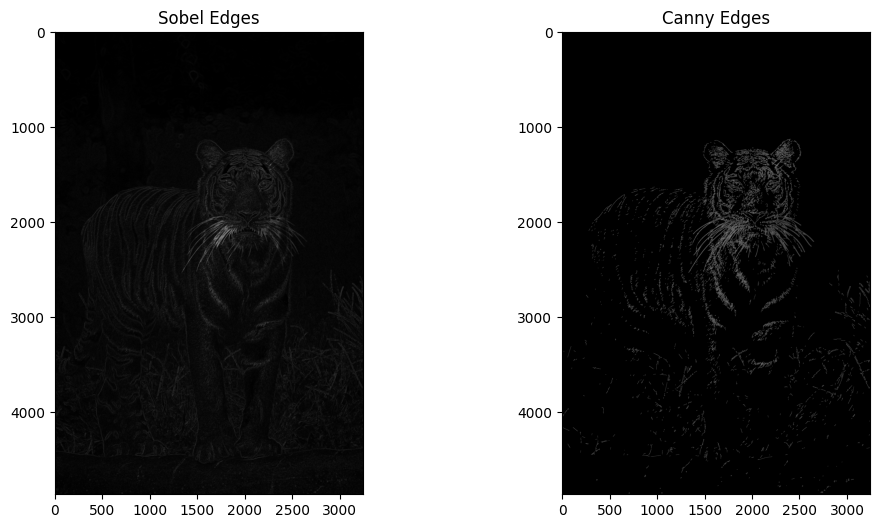

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Sobel Edges")
plt.imshow(edges_sobel, cmap="gray")
plt.subplot(1, 2, 2)
plt.title("Canny Edges")
plt.imshow(edges_canny, cmap="gray")
plt.show()

Compute second-order gradients using the Laplacian operator

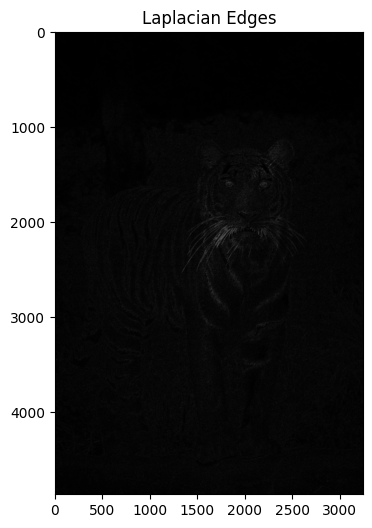

In [ ]:
laplacian = cv2.Laplacian(img, cv2.CV_64F)
laplacian = np.uint8(np.absolute(laplacian))

plt.figure(figsize=(6, 6))
plt.title("Laplacian Edges")
plt.imshow(laplacian, cmap="gray")
plt.show()

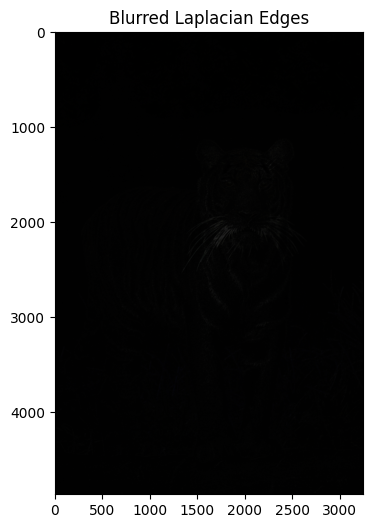

In [ ]:
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)
blurred_laplacian = cv2.Laplacian(blurred_image, cv2.CV_64F)
blurred_laplacian = np.uint8(np.absolute(blurred_laplacian))

plt.figure(figsize=(6, 6))
plt.title("Blurred Laplacian Edges")
plt.imshow(blurred_laplacian, cmap="gray")
plt.show()

Apply Sobel, Canny, and LoG side by side

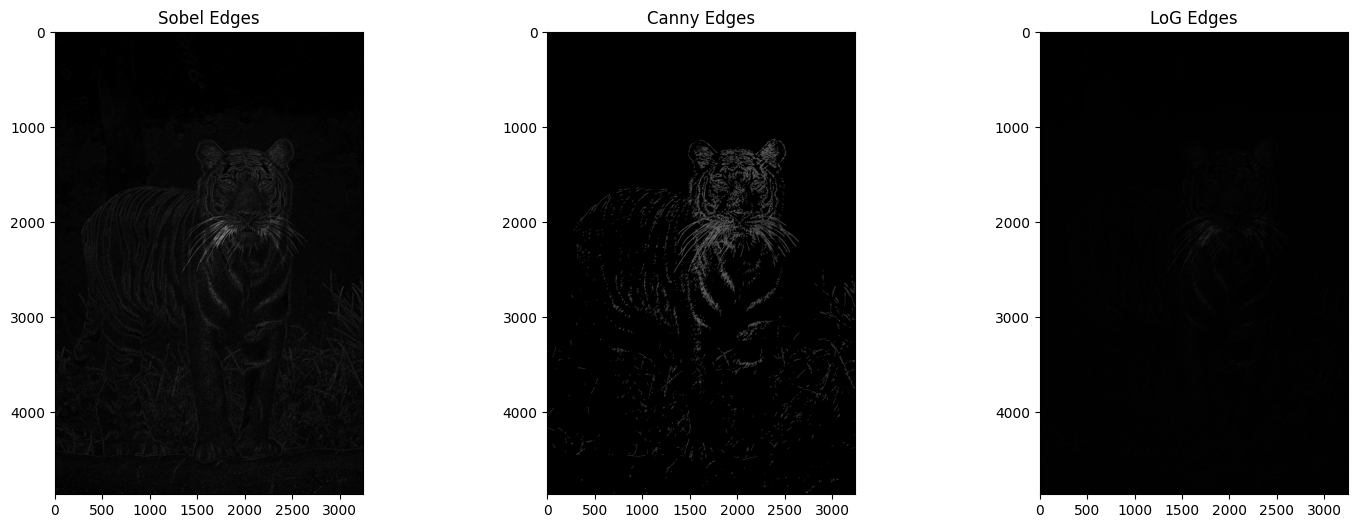

In [ ]:
log = cv2.Laplacian(cv2.GaussianBlur(image, (5, 5), 0), cv2.CV_64F)
log = np.uint8(np.absolute(log))

plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.title("Sobel Edges")
plt.imshow(edges_sobel, cmap="gray")
plt.subplot(1, 3, 2)
plt.title("Canny Edges")
plt.imshow(edges_canny, cmap="gray")
plt.subplot(1, 3, 3)
plt.title("LoG Edges")
plt.imshow(log, cmap="gray")
plt.show()

Add random noise and test edge detection

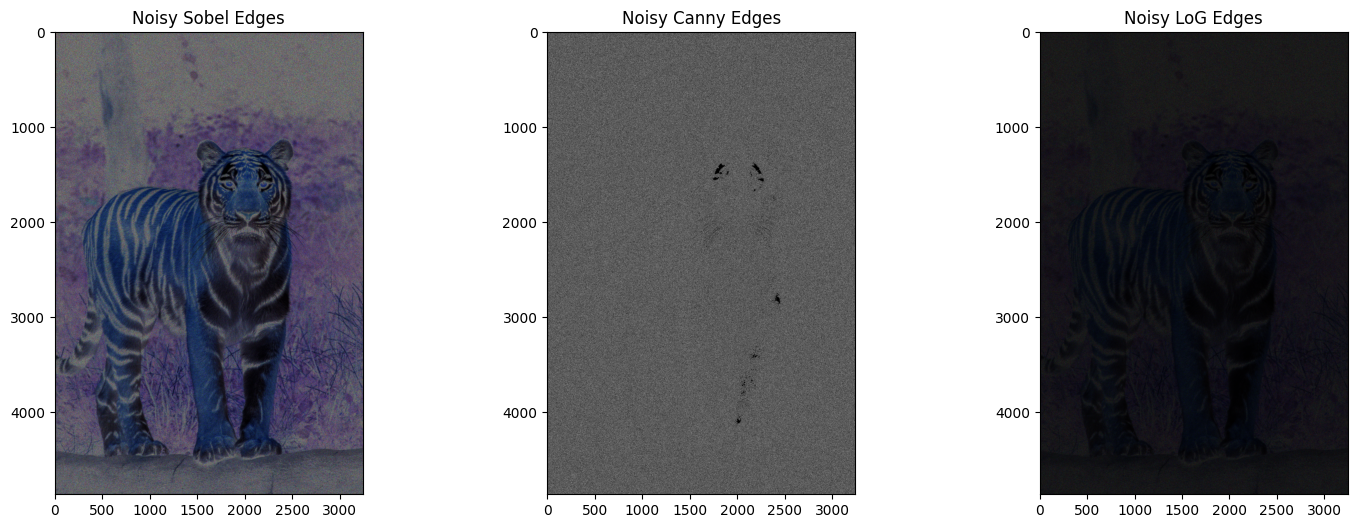

In [ ]:
noise = np.random.normal(0, 25, image.shape).astype(np.uint8)
noisy_image = cv2.add(image, noise)

noisy_sobel_x = cv2.Sobel(noisy_image, cv2.CV_64F, 1, 0, ksize=3)
noisy_sobel_y = cv2.Sobel(noisy_image, cv2.CV_64F, 0, 1, ksize=3)
noisy_sobel = np.sqrt(np.absolute(noisy_sobel_x)**2 + np.absolute(noisy_sobel_y)**2)
noisy_sobel = np.uint8(noisy_sobel / noisy_sobel.max() * 255)

noisy_canny = cv2.Canny(noisy_image, 100, 20)
noisy_log = cv2.Laplacian(cv2.GaussianBlur(noisy_image, (5, 5), 0), cv2.CV_64F)
noisy_log = np.uint8(np.absolute(noisy_log))

plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.title("Noisy Sobel Edges")
plt.imshow(noisy_sobel, cmap="gray")
plt.subplot(1, 3, 2)
plt.title("Noisy Canny Edges")
plt.imshow(noisy_canny, cmap="gray")
plt.subplot(1, 3, 3)
plt.title("Noisy LoG Edges")
plt.imshow(noisy_log, cmap="gray")
plt.show()
